exp-03(Binning)

In [1]:
# Function to partition data into equal-frequency (equi-depth) bins
def partition_into_bins(data, num_bins):
    data.sort()  # Sort the data
    n = len(data)

    # Calculate how many items should go into each bin
    bin_size = n // num_bins
    remainder = n % num_bins  # Remainder to distribute among bins

    bins = []
    start_index = 0

    for i in range(num_bins):
        # Calculate the size of the current bin
        current_bin_size = bin_size + (1 if i < remainder else 0)  # Distribute the remainder

        # Append the current bin to the list of bins
        bins.append(data[start_index:start_index + current_bin_size])
        start_index += current_bin_size  # Move the start index for the next bin

    return bins

# Function to smooth data by bin means
def smooth_by_bin_means(bins):
    smoothed_bins = []

    for bin in bins:
        bin_mean = sum(bin) // len(bin)  # Calculate bin mean
        smoothed_bins.append([bin_mean] * len(bin))  # Replace all elements in bin by mean

    return smoothed_bins

# Function to smooth data by bin boundaries
def smooth_by_bin_boundaries(bins):
    smoothed_bins = []

    for bin in bins:
        min_boundary = bin[0]  # Minimum value in the bin
        max_boundary = bin[-1]  # Maximum value in the bin

        # Replace each element with the closest boundary
        smoothed_bin = []
        for value in bin:
            if value - min_boundary <= max_boundary - value:
                smoothed_bin.append(min_boundary)
            else:
                smoothed_bin.append(max_boundary)
        smoothed_bins.append(smoothed_bin)

    return smoothed_bins

# Main function to take user input and perform binning
def main():
    # Input data from user (comma-separated values)
    data_input = input("Enter the data (comma-separated values): ")
    data = list(map(int, data_input.split(',')))  # Convert to a list of integers

    # Input bin size from user
    num_bins = int(input("Enter the number of bins: "))

    # Partition the data into equal-frequency bins
    bins = partition_into_bins(data, num_bins)

    # Print original bins
    print("\nOriginal Equal-Frequency Bins:")
    for i, bin in enumerate(bins, 1):
        print(f"Bin {i}: {bin}")

    # Perform smoothing by bin means and retain the same bin structure
    smoothed_by_means = smooth_by_bin_means(bins)
    print("\nSmoothing by Bin Means (in bins):")
    for i, bin in enumerate(smoothed_by_means, 1):
        print(f"Bin {i}: {bin}")

    # Perform smoothing by bin boundaries and retain the same bin structure
    smoothed_by_boundaries = smooth_by_bin_boundaries(bins)
    print("\nSmoothing by Bin Boundaries (in bins):")
    for i, bin in enumerate(smoothed_by_boundaries, 1):
        print(f"Bin {i}: {bin}")

# Run the main function
if __name__ == "__main__":
    main()


Enter the data (comma-separated values): 12,13,45,67,8,9,0,23,4,5
Enter the number of bins: 3

Original Equal-Frequency Bins:
Bin 1: [0, 4, 5, 8]
Bin 2: [9, 12, 13]
Bin 3: [23, 45, 67]

Smoothing by Bin Means (in bins):
Bin 1: [4, 4, 4, 4]
Bin 2: [11, 11, 11]
Bin 3: [45, 45, 45]

Smoothing by Bin Boundaries (in bins):
Bin 1: [0, 0, 8, 8]
Bin 2: [9, 13, 13]
Bin 3: [23, 23, 67]


Exp-04 (Navies Bayes Algorithm)

In [ ]:
import pandas as pd

def calculate_probability(df, class_label):
    class_count = df['Class'].value_counts().get(class_label, 0)
    total_count = len(df)
    probability = class_count / total_count
    print(f"Probability of '{class_label}': {probability:.4f}")
    return probability

def calculate_conditional_probability(df, feature, value, class_label):
    # Convert boolean to string if necessary
    if isinstance(value, bool):
        value = str(value)

    # Handle case where feature values might be boolean
    if df[feature].dtype == bool:
        value = value.lower() == 'true'  # Convert string 'true'/'false' to boolean

    # Filter rows and calculate probability
    matching_rows = df[(df[feature].astype(str).str.strip().str.lower() == str(value).lower()) & (df['Class'] == class_label)]
    matching_count = len(matching_rows)
    class_count = df['Class'].value_counts().get(class_label, 0)
    probability = matching_count / class_count if class_count > 0 else 0
    print(f"Conditional probability of '{feature}' = '{value}' given '{class_label}': {probability:.4f}")
    return probability

def predict_class(df, outlook, temperature, humidity, windy):
    print("\nCalculating probabilities for prediction...")

    # Overall probabilities
    play_probability = calculate_probability(df, "Play")
    noplay_probability = calculate_probability(df, "No Play")

    # Conditional probabilities for 'Play'
    i1_playprobability = calculate_conditional_probability(df, 'Outlook', outlook, "Play")
    i2_playprobability = calculate_conditional_probability(df, 'Temperature', temperature, "Play")
    i3_playprobability = calculate_conditional_probability(df, 'Humidity', humidity, "Play")
    i4_playprobability = calculate_conditional_probability(df, 'Windy', windy, "Play")

    # Conditional probabilities for 'No Play'
    i1_noplayprobability = calculate_conditional_probability(df, 'Outlook', outlook, "No Play")
    i2_noplayprobability = calculate_conditional_probability(df, 'Temperature', temperature, "No Play")
    i3_noplayprobability = calculate_conditional_probability(df, 'Humidity', humidity, "No Play")
    i4_noplayprobability = calculate_conditional_probability(df, 'Windy', windy, "No Play")

    # Final probabilities
    final_playprobability = play_probability * i1_playprobability * i2_playprobability * i3_playprobability * i4_playprobability
    final_noplayprobability = noplay_probability * i1_noplayprobability * i2_noplayprobability * i3_noplayprobability * i4_noplayprobability

    print(f"Final probability of 'Play': {final_playprobability:.4f}")
    print(f"Final probability of 'No Play': {final_noplayprobability:.4f}")

    return "Play" if final_playprobability > final_noplayprobability else "No Play"

def main():
    df_train = pd.read_csv("navie_weather.csv")
    df_test = pd.read_csv("navie_test.csv")

    correct_predictions = 0

    # Iterate over each row in the test DataFrame
    for index, row in df_test.iterrows():
        outlook = row['Outlook']
        temperature = row['Temperature']
        humidity = row['Humidity']
        windy = row['Windy']
        actual_class = row['Class']

        # Predict class
        predicted_class = predict_class(df_train, outlook, temperature, humidity, windy)
        # Store predicted class in DataFrame
        df_test.at[index, 'Predicted Class'] = predicted_class

        # Compare and count correct predictions
        if predicted_class == actual_class:
            correct_predictions += 1

    # Calculate accuracy
    accuracy = (correct_predictions / len(df_test)) * 100
    print(f"Accuracy: {accuracy:.2f}%")

    df_test.to_csv("test_with_predictions.csv", index=False)

if __name__ == "__main__":
    main()



Calculating probabilities for prediction...
Probability of 'Play': 0.6429
Probability of 'No Play': 0.3571
Conditional probability of 'Outlook' = 'Sunny' given 'Play': 0.2222
Conditional probability of 'Temperature' = 'Hot' given 'Play': 0.2222
Conditional probability of 'Humidity' = 'High' given 'Play': 0.3333
Conditional probability of 'Windy' = 'False' given 'Play': 0.6667
Conditional probability of 'Outlook' = 'Sunny' given 'No Play': 0.6000
Conditional probability of 'Temperature' = 'Hot' given 'No Play': 0.4000
Conditional probability of 'Humidity' = 'High' given 'No Play': 0.8000
Conditional probability of 'Windy' = 'False' given 'No Play': 0.4000
Final probability of 'Play': 0.0071
Final probability of 'No Play': 0.0274

Calculating probabilities for prediction...
Probability of 'Play': 0.6429
Probability of 'No Play': 0.3571
Conditional probability of 'Outlook' = 'Sunny' given 'Play': 0.2222
Conditional probability of 'Temperature' = 'Hot' given 'Play': 0.2222
Conditional pro

EXP-05 (kmean_1d)

Initial cluster centers (randomly selected): [4 2 3]

Iteration 1 distances:
Distances from point 1 to centers: [3, 1, 2]
Distances from point 2 to centers: [2, 0, 1]
Distances from point 3 to centers: [1, 1, 0]
Distances from point 4 to centers: [0, 2, 1]
Distances from point 5 to centers: [1, 3, 2]

Iteration 2 distances:
Distances from point 1 to centers: [3.5, 0.5, 2.0]
Distances from point 2 to centers: [2.5, 0.5, 1.0]
Distances from point 3 to centers: [1.5, 1.5, 0.0]
Distances from point 4 to centers: [0.5, 2.5, 1.0]
Distances from point 5 to centers: [0.5, 3.5, 2.0]
Cluster 0: [4 5]
Cluster 1: [1 2]
Cluster 2: [3]


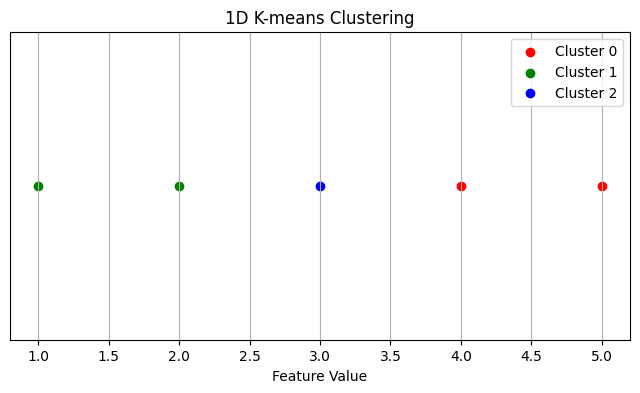

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

def euclidean_distance(point1, point2):
    """Calculate the Euclidean distance between two points."""
    return np.abs(point1 - point2)

def k_means_clustering_1d(data, k, max_iterations=100):
    """Perform K-means clustering on 1D data."""
    initial_indices = random.sample(range(data.shape[0]), k)
    centers = data[initial_indices]

    print(f"Initial cluster centers (randomly selected): {centers}")

    # Store distances for each iteration
    all_distances = []

    for iteration in range(max_iterations):
        assignments = np.zeros(data.shape[0])
        iteration_distances = []  # Store distances for this iteration

        # (3) Assign each object to the closest cluster
        for i in range(data.shape[0]):
            distances = [round(euclidean_distance(data[i], center), 2) for center in centers]
            iteration_distances.append((data[i], distances))  # Save the point and distances
            assignments[i] = np.argmin(distances)

        all_distances.append(iteration_distances)  # Save distances for the iteration

        # (4) Update the cluster means
        new_centers = np.array([data[assignments == i].mean() for i in range(k)])

        # Check for convergence
        if np.array_equal(centers, new_centers):
            break
        centers = new_centers

    # Create final clusters
    clusters = [data[assignments == i] for i in range(k)]

    # Print distances for each iteration
    for iter_idx, distances in enumerate(all_distances):
        print(f"\nIteration {iter_idx + 1} distances:")
        for point, distance_values in distances:
            print(f"Distances from point {point} to centers: {distance_values}")

    return clusters

def plot_clusters_1d(data, clusters):
    """Visualize the clustering result for 1D data."""
    plt.figure(figsize=(8, 4))
    colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan']
    for i, cluster in enumerate(clusters):
        plt.scatter(cluster, np.zeros_like(cluster), color=colors[i % len(colors)], label=f'Cluster {i}')
    plt.title('1D K-means Clustering')
    plt.xlabel('Feature Value')
    plt.yticks([])  # Hide y-axis ticks
    plt.legend()
    plt.grid()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Load data from a CSV file
    data = pd.read_csv('kmean_1d.csv').values.flatten()  # Ensure data is a 1D array

    k = 3  # Number of clusters
    clusters = k_means_clustering_1d(data, k)

    # Output results
    for i, cluster in enumerate(clusters):
        print(f"Cluster {i}: {cluster}")

    # Plot the clusters
    plot_clusters_1d(data, clusters)


EXP-05 (kmean_2d)

Initial cluster centers (randomly selected): [[ 7  8]
 [67 89]
 [ 9 70]]

Iteration 1 distances:
Distances from point [1 3] to centers: [7.81, 108.41, 67.48]
Distances from point [5 6] to centers: [2.83, 103.6, 64.12]
Distances from point [7 8] to centers: [0.0, 100.8, 62.03]
Distances from point [ 9 70] to centers: [62.03, 61.03, 0.0]
Distances from point [67 89] to centers: [100.8, 0.0, 61.03]

Iteration 2 distances:
Distances from point [1 3] to centers: [4.27, 108.41, 67.48]
Distances from point [5 6] to centers: [0.75, 103.6, 64.12]
Distances from point [7 8] to centers: [3.54, 100.8, 62.03]
Distances from point [ 9 70] to centers: [64.5, 61.03, 0.0]
Distances from point [67 89] to centers: [104.27, 0.0, 61.03]
Cluster 0: [[1 3]
 [5 6]
 [7 8]]
Cluster 1: [[67 89]]
Cluster 2: [[ 9 70]]


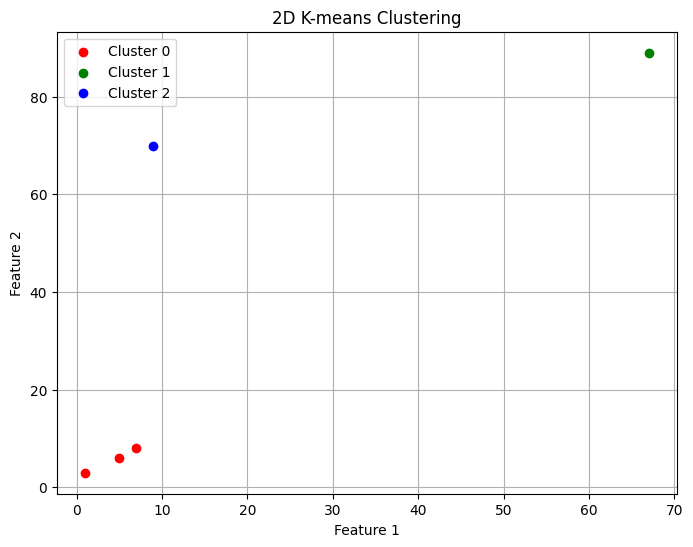

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

def euclidean_distance(point1, point2):
    """Calculate the Euclidean distance between two points."""
    return np.sqrt(np.sum((point1 - point2) ** 2))

def k_means_clustering_2d(data, k, max_iterations=100):
    """Perform K-means clustering on 2D data."""
    initial_indices = random.sample(range(data.shape[0]), k)
    centers = data[initial_indices]

    print(f"Initial cluster centers (randomly selected): {centers}")

    # Store distances for each iteration
    all_distances = []

    for iteration in range(max_iterations):
        assignments = np.zeros(data.shape[0])
        iteration_distances = []  # Store distances for this iteration

        # (3) Assign each object to the closest cluster
        for i in range(data.shape[0]):
            distances = [round(euclidean_distance(data[i], center), 2) for center in centers]
            iteration_distances.append((data[i], distances))  # Save the point and distances
            assignments[i] = np.argmin(distances)

        all_distances.append(iteration_distances)  # Save distances for the iteration

        # (4) Update the cluster means
        new_centers = np.array([data[assignments == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.array_equal(centers, new_centers):
            break
        centers = new_centers

    # Create final clusters
    clusters = [data[assignments == i] for i in range(k)]

    # Print distances for each iteration
    for iter_idx, distances in enumerate(all_distances):
        print(f"\nIteration {iter_idx + 1} distances:")
        for point, distance_values in distances:
            print(f"Distances from point {point} to centers: {distance_values}")

    return clusters

def plot_clusters(data, clusters):
    """Visualize the clustering result for 2D data."""
    plt.figure(figsize=(8, 6))
    colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan']
    for i, cluster in enumerate(clusters):
        plt.scatter(cluster[:, 0], cluster[:, 1], color=colors[i % len(colors)], label=f'Cluster {i}')
    plt.title('2D K-means Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Load data from a CSV file
    data = pd.read_csv('kmean_2d.csv').values  # Ensure data is a 2D array

    k = 3  # Number of clusters
    clusters = k_means_clustering_2d(data, k)

    # Output results
    for i, cluster in enumerate(clusters):
        print(f"Cluster {i}: {cluster}")

    # Plot the clusters
    plot_clusters(data, clusters)


EXP-07 (AGGLOMERITIVE ALGORITM)

  Point   X   Y
0    P1   4   4
1    P2   8   4
2    P3  15   8
3    P4  24   4
4    P5  24  12

Distance Matrix:
 Point         P1         P2         P3         P4         P5
Point                                                       
P1      0.000000   4.000000  11.704700  20.000000  21.540659
P2      4.000000   0.000000   8.062258  16.000000  17.888544
P3     11.704700   8.062258   0.000000   9.848858   9.848858
P4     20.000000  16.000000   9.848858   0.000000   8.000000
P5     21.540659  17.888544   9.848858   8.000000   0.000000
Minimum distance for all points: P1 and P2 – minimum distance = 4.00
Initial Clusters: [['P1'], ['P2'], ['P3'], ['P4'], ['P5']]
Updated Clusters after merging: [['P3'], ['P4'], ['P5'], ['P1', 'P2']]
New Distance Matrix:
                 ['P3']     ['P4']     ['P5']  ['P1', 'P2']
['P3']        0.000000   9.848858   9.848858      9.848858
['P4']        9.848858   0.000000   8.000000     18.000000
['P5']        9.848858   8.000000   0.000000     19.697716
[

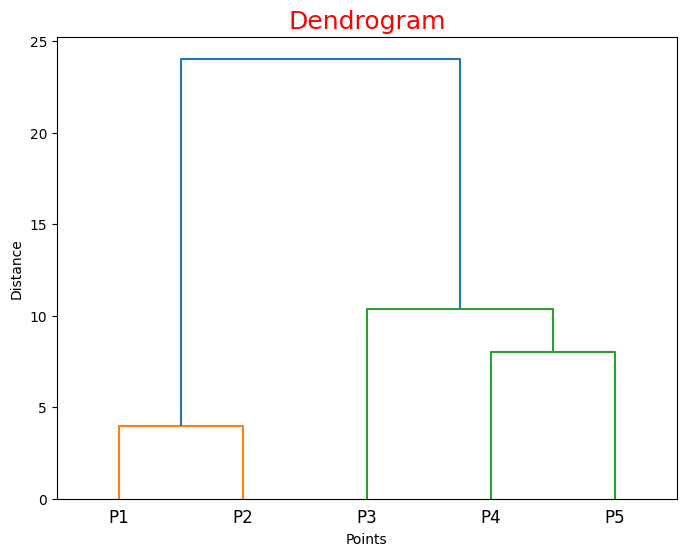

In [ ]:
#Step 1- Read csv file with n features
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage




# Define the points

"""data = {
    'Point': ['P1', 'P2', 'P3', 'P4', 'P5'],
    'X': [4, 8, 15, 24, 24],
    'Y': [4, 4, 8, 4, 12]
}

df = pd.DataFrame(data)
df.to_csv('data.csv', index=False)
print(df)"""


data = pd.read_csv('agglo_data.csv')
coordinates = data[['X', 'Y']].values
print(data)

#Step2- Find distance between object with every
#other object. You can use Euclidean function
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

#Step 3 - Find Distance Matrix using Euclidean distance formula
# Initialize a distance matrix
num_points = len(coordinates)
distance_matrix = np.zeros((num_points, num_points))

# Compute the distance matrix
for i in range(num_points):
    for j in range(num_points):
        if i != j:
            distance_matrix[i, j] = euclidean_distance(coordinates[i], coordinates[j])

# Display the distance matrix
distance_df = pd.DataFrame(distance_matrix, columns=data['Point'], index=data['Point'])
print("\nDistance Matrix:\n", distance_df)

# Step 4: Find Minimum Distance and Involved Objects for All Points
min_distance = float('inf')
point_pair = (None, None)

for i in range(num_points):
    for j in range(num_points):
        if i != j and distance_matrix[i, j] < min_distance:
            min_distance = distance_matrix[i, j]
            point_pair = (data['Point'][i], data['Point'][j])

# Display the results
print(f"Minimum distance for all points: {point_pair[0]} and {point_pair[1]} – minimum distance = {min_distance:.2f}")

#Step 5 . Merge these objects P1and P2. Now (P1,P2) is one unit/cluster.
# Initialize clusters
clusters = [[data['Point'][i]] for i in range(len(data))]
print("Initial Clusters:", clusters)
# Merge P1 and P2

if point_pair[0] and point_pair[1]:
    merged_cluster = [point_pair[0], point_pair[1]]

    # Update the clusters list
    clusters = [c for c in clusters if c[0] not in merged_cluster]  # Remove old clusters
    clusters.append(merged_cluster)  # Add the new cluster

print("Updated Clusters after merging:", clusters)

#Step 6 : Recalculate the distances.

def update_cluster_coordinates(clusters, original_coordinates):
    new_coordinates = []
    for cluster in clusters:
        if len(cluster) == 1:
            new_coordinates.append(original_coordinates[data['Point'].tolist().index(cluster[0])])
        else:
            avg_coordinates = np.mean([original_coordinates[data['Point'].tolist().index(point)] for point in cluster], axis=0)
            new_coordinates.append(avg_coordinates)

    return np.array(new_coordinates)

# Calculate new cluster coordinates
updated_coordinates = update_cluster_coordinates(clusters, coordinates)

# Initialize the new distance matrix
num_updated_points = len(updated_coordinates)
new_distance_matrix = np.zeros((num_updated_points, num_updated_points))

# Compute the new distance matrix
for i in range(num_updated_points):
    for j in range(num_updated_points):
        if i != j:
            new_distance_matrix[i, j] = euclidean_distance(updated_coordinates[i], updated_coordinates[j])

# Create a DataFrame for easier reading
new_distance_df = pd.DataFrame(new_distance_matrix, columns=[str(cluster) for cluster in clusters], index=[str(cluster) for cluster in clusters])
print("New Distance Matrix:\n", new_distance_df)



# Perform hierarchical clustering using Ward's method
Z = linkage(df[['X', 'Y']], method='ward')

# Plot the dendrogram
plt.figure(figsize=(8, 6))
dendrogram(Z, labels=df['Point'].values)
plt.title('Dendrogram', fontsize=18, color='red')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()


Exp-08 (Apriori Algorithm)

In [ ]:
import pandas as pd
from itertools import combinations

# Load CSV file and preprocess the data
def load_data(file_path):
    data = pd.read_csv(file_path)
    transactions = []

    # Iterate through each row in the DataFrame
    for i in range(len(data)):
        transaction = []
        # Check for each item column (item1, item2, item3, item4, item5)
        for j in range(1, len(data.columns)):
            item = data.iloc[i, j]
            if pd.notna(item):  # Check if the item is not NaN
                transaction.append(item)
        transactions.append(transaction)

    return transactions

# Calculate the support of itemsets
def calculate_support(transactions, itemsets):
    support = {}
    for itemset in itemsets:
        itemset_tuple = tuple(itemset)
        support_count = sum([1 for transaction in transactions if set(itemset).issubset(set(transaction))])
        support[itemset_tuple] = support_count / len(transactions)
    return support

# Prune itemsets that do not meet the minimum support
def prune_itemsets(support, min_support):
    return {itemset: support_val for itemset, support_val in support.items() if support_val >= min_support}

# Generate candidate itemsets of size k+1 from frequent itemsets of size k
def generate_candidates(frequent_itemsets, k):
    candidates = set()
    frequent_items = list(frequent_itemsets.keys())

    for i in range(len(frequent_items)):
        for j in range(i + 1, len(frequent_items)):
            union_set = set(frequent_items[i]).union(frequent_items[j])
            if len(union_set) == k + 1:
                candidates.add(tuple(sorted(union_set)))

    return candidates

# Calculate confidence for association rules
def calculate_confidence(frequent_itemsets, transactions, min_confidence):
    rules = []

    for itemset in frequent_itemsets:
        if len(itemset) > 1:
            subsets = list(combinations(itemset, len(itemset) - 1))

            for subset in subsets:
                remaining = tuple(set(itemset) - set(subset))
                subset_support = sum([1 for transaction in transactions if set(subset).issubset(set(transaction))]) / len(transactions)
                itemset_support = frequent_itemsets[itemset]

                confidence = itemset_support / subset_support if subset_support > 0 else 0

                # Convert confidence to percentage
                confidence_percentage = confidence * 100

                if confidence >= min_confidence:
                    rules.append((subset, remaining, confidence_percentage))

    return rules

# Apriori algorithm
def apriori(transactions, min_support, min_confidence):
    # Generate 1-itemsets
    itemsets = [{item} for transaction in transactions for item in transaction]
    itemsets = [list(x) for x in set(tuple(sorted(x)) for x in itemsets)]

    # Calculate initial support for 1-itemsets
    support = calculate_support(transactions, itemsets)

    # Filter out itemsets that do not meet minimum support
    frequent_itemsets = prune_itemsets(support, min_support)

    all_frequent_itemsets = frequent_itemsets.copy()
    k = 1

    while frequent_itemsets:
        # Generate candidate itemsets of size k+1
        candidates = generate_candidates(frequent_itemsets, k)

        # Calculate support for candidate itemsets
        support = calculate_support(transactions, candidates)

        # Prune itemsets that do not meet the minimum support
        frequent_itemsets = prune_itemsets(support, min_support)

        # Add frequent itemsets to the global list
        all_frequent_itemsets.update(frequent_itemsets)

        k += 1

    # Calculate confidence for association rules
    rules = calculate_confidence(all_frequent_itemsets, transactions, min_confidence)

    return all_frequent_itemsets, rules

# Main
if __name__ == '__main__':
    file_path = 'aprior.csv'  # Ensure this matches your actual file path
    min_support = 0.3
    min_confidence_percentage = 70  # Minimum confidence in percentage

    # Convert percentage to decimal for calculations
    min_confidence = min_confidence_percentage / 100.0

    # Load transactions
    transactions = load_data(file_path)

    # Run Apriori algorithm
    frequent_itemsets, rules = apriori(transactions, min_support, min_confidence)

    # Output Frequent Itemsets
    print("Frequent Itemsets:")
    for itemset, support in frequent_itemsets.items():
        print(f"{itemset}: {support:.2f}")

    # Output Association Rules with Confidence in Percentage
    print("\nAssociation Rules:")
    for rule in rules:
        antecedent, consequent, confidence = rule
        print(f"{antecedent} -> {consequent}: Confidence = {confidence:.2f}%")


Frequent Itemsets:
('cheese',): 0.45
('fruit',): 0.64
('sugar',): 0.55
('milk',): 0.82
('eggs',): 0.55
('butter',): 0.82
('bread',): 0.64
('jam',): 0.55
('jam', 'sugar'): 0.36
('jam', 'milk'): 0.36
('butter', 'sugar'): 0.36
('bread', 'butter'): 0.55
('butter', 'milk'): 0.64
('bread', 'fruit'): 0.36
('butter', 'eggs'): 0.45
('eggs', 'milk'): 0.45
('cheese', 'milk'): 0.36
('fruit', 'jam'): 0.36
('bread', 'milk'): 0.55
('bread', 'eggs'): 0.36
('butter', 'jam'): 0.45
('milk', 'sugar'): 0.36
('butter', 'fruit'): 0.55
('fruit', 'sugar'): 0.36
('fruit', 'milk'): 0.55
('bread', 'butter', 'fruit'): 0.36
('bread', 'butter', 'milk'): 0.45
('butter', 'fruit', 'milk'): 0.45
('bread', 'eggs', 'milk'): 0.36
('butter', 'eggs', 'milk'): 0.36

Association Rules:
('bread',) -> ('butter',): Confidence = 85.71%
('butter',) -> ('milk',): Confidence = 77.78%
('milk',) -> ('butter',): Confidence = 77.78%
('eggs',) -> ('butter',): Confidence = 83.33%
('eggs',) -> ('milk',): Confidence = 83.33%
('cheese',) -> (

EXP-09 (PAGE RANK ALGORITHM)

In [ ]:
import numpy as np

def page_rank(graph, num_iterations=100, d=0.85):
    """
    Computes the PageRank of each node in the graph.

    Parameters:
    - graph: dict, a dictionary where keys are node IDs and values are lists of nodes they link to
    - num_iterations: int, number of iterations to perform
    - d: float, damping factor (usually set to 0.85)

    Returns:
    - rank: dict, a dictionary of nodes with their corresponding PageRank scores
    """

    # Number of nodes
    num_nodes = len(graph)

    # Initialize PageRank scores
    rank = {node: 1 / num_nodes for node in graph}

    for iteration in range(num_iterations):
        new_rank = {node: (1 - d) / num_nodes for node in graph}

        for node, links in graph.items():
            if len(links) == 0:
                continue  # Handle dangling nodes
            for link in links:
                new_rank[link] += d * (rank[node] / len(links))

        rank = new_rank

        # Print the PageRank scores for this iteration
        print(f"Iteration {iteration + 1}: {rank}")

    return rank

# Example graph represented as an adjacency list
graph = {
    'A': ['B', 'C'],
    'B': ['C'],
    'C': ['A'],
    'D': ['B'],
    'E': ['A', 'D']
}

# Compute PageRank with iteration visualization
rank_scores = page_rank(graph, num_iterations=10)
print("Final PageRank scores:", rank_scores)



Iteration 1: {'A': 0.28500000000000003, 'B': 0.28500000000000003, 'C': 0.28500000000000003, 'D': 0.11500000000000002, 'E': 0.030000000000000006}
Iteration 2: {'A': 0.28500000000000003, 'B': 0.248875, 'C': 0.39337500000000003, 'D': 0.04275000000000001, 'E': 0.030000000000000006}
Iteration 3: {'A': 0.37711875, 'B': 0.18746250000000003, 'C': 0.36266875, 'D': 0.04275000000000001, 'E': 0.030000000000000006}
Iteration 4: {'A': 0.3510184375, 'B': 0.22661296874999998, 'C': 0.34961859375000004, 'D': 0.04275000000000001, 'E': 0.030000000000000006}
Iteration 5: {'A': 0.33992580468750005, 'B': 0.21552033593750003, 'C': 0.371803859375, 'D': 0.04275000000000001, 'E': 0.030000000000000006}
Iteration 6: {'A': 0.35878328046875, 'B': 0.2108059669921875, 'C': 0.35766075253906254, 'D': 0.04275000000000001, 'E': 0.030000000000000006}
Iteration 7: {'A': 0.34676163965820317, 'B': 0.21882039419921878, 'C': 0.3616679661425781, 'D': 0.04275000000000001, 'E': 0.030000000000000006}
Iteration 8: {'A': 0.3501677712

EXP-10 (HITS ALGORITHM)

Authority Scores: [6.31857978e-07 8.50650808e-01 5.25731112e-01]
Hub Scores: [8.50650808e-01 3.90509707e-07 5.25731112e-01]


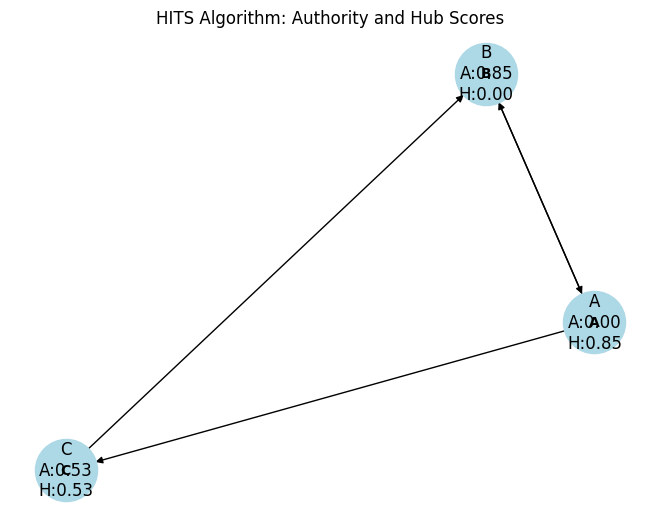

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def hits(graph, num_iterations=100):
    N = len(graph)

    # Initialize hub and authority scores
    hub_scores = np.ones(N)
    authority_scores = np.ones(N)

    for _ in range(num_iterations):
        # Update authority scores
        new_authority_scores = np.zeros(N)
        for i in range(N):
            for j in range(N):
                if graph[j][i] == 1:  # If there's a link from j to i
                    new_authority_scores[i] += hub_scores[j]

        # Update hub scores
        new_hub_scores = np.zeros(N)
        for i in range(N):
            for j in range(N):
                if graph[i][j] == 1:  # If there's a link from i to j
                    new_hub_scores[i] += new_authority_scores[j]

        # Normalize authority scores
        authority_norm = np.linalg.norm(new_authority_scores, 2)
        if authority_norm > 0:
            new_authority_scores /= authority_norm

        # Normalize hub scores
        hub_norm = np.linalg.norm(new_hub_scores, 2)
        if hub_norm > 0:
            new_hub_scores /= hub_norm

        # Check for convergence
        if (np.all(np.abs(new_authority_scores - authority_scores) < 1e-6) and
            np.all(np.abs(new_hub_scores - hub_scores) < 1e-6)):
            break

        authority_scores = new_authority_scores
        hub_scores = new_hub_scores

    return authority_scores, hub_scores

def visualize_graph(graph, authority_scores, hub_scores, pages):
    G = nx.DiGraph()

    # Add edges to the graph
    for i in range(len(graph)):
        for j in range(len(graph)):
            if graph[i][j] == 1:
                G.add_edge(pages[i], pages[j])

    pos = nx.spring_layout(G)  # positions for all nodes
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')

    # Display scores on the nodes
    labels = {pages[i]: f"{pages[i]}\nA:{authority_scores[i]:.2f}\nH:{hub_scores[i]:.2f}" for i in range(len(pages))}
    nx.draw_networkx_labels(G, pos, labels=labels)

    plt.title("HITS Algorithm: Authority and Hub Scores")
    plt.show()

# Example usage
pages = ['A', 'B', 'C']
graph = np.array([[0, 1, 1],  # A -> B, A -> C
                  [1, 0, 0],  # B -> A
                  [0, 1, 0]]) # C -> B

authority_scores, hub_scores = hits(graph)
print("Authority Scores:", authority_scores)
print("Hub Scores:", hub_scores)

# Visualize the graph
visualize_graph(graph, authority_scores, hub_scores, pages)
